# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [7]:
# Read "states_edu.csv"
states_edu = pd.read_csv("states_edu.csv")
states_edu.head()

PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G  GRADES_1_8_G  GRADES_9_12_G  \
0  ...     57948.0     58025.0      41167.0           NaN            NaN   
1  ...      9748.0      8789.0       6714.0           NaN            NaN   
2  ...     55433.0     49081.0      37410.0           NaN            NaN   
3  ...     34632.0     36011.0      27651.0           NaN            NaN   
4  ...    418418.0    363296.0     270675.0           NaN            NaN   

   GRADES_ALL_G  AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
0      731634.0             208.0             252.0                207.0   
1      122487.0               NaN               NaN                  NaN   
2      673477.0             215.0             265.0                209.0   
3      441490.0             210.0             256.0                211.0   
4     5254844.0             208.0             261.0                202.0   

   AVG_READING_8_SCORE  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 25 columns]

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [10]:
non_states = ['DODEA', 'NATIONAL', 'DISTRICT_OF_COLUMBIA']
states_edu = states_edu[~states_edu["STATE"].isin(non_states)]

states_edu["ENROLL"] = states_edu["ENROLL"].fillna(states_edu["GRADES_ALL_G"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [14]:
# @@@ 1
unique_years = states_edu["YEAR"].unique()
print(len(unique_years))

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [16]:
# @@@ 2
michigan_avg = round(states_edu.loc[states_edu["STATE"] == "MICHIGAN", "AVG_MATH_4_SCORE"].mean(),2)
ohio_avg = round(states_edu.loc[states_edu["STATE"] == "OHIO", "AVG_MATH_4_SCORE"].mean(),2)

print("Average grade 4 math score in Michigan:", michigan_avg)
print("Average grade 4 math score in Ohio:", ohio_avg)

Average grade 4 math score in Michigan: 234.36
Average grade 4 math score in Ohio: 239.45


Find the average for your chosen test across all states in 2019

In [18]:
# @@@ 3
all_states_avg = states_edu.loc[states_edu["YEAR"] == 2019, "AVG_MATH_4_SCORE"].mean()
print(all_states_avg)

239.82


For each state, find a maximum value for your chosen test score

In [20]:
# @@@ 4
max_scores_per_state = states_edu.groupby("STATE")["AVG_MATH_4_SCORE"].max()
print(max_scores_per_state)

STATE
ALABAMA           233.0
ALASKA            237.0
ARIZONA           240.0
ARKANSAS          240.0
CALIFORNIA        235.0
COLORADO          247.0
CONNECTICUT       245.0
DELAWARE          243.0
FLORIDA           246.0
GEORGIA           240.0
HAWAII            243.0
IDAHO             242.0
ILLINOIS          239.0
INDIANA           249.0
IOWA              246.0
KANSAS            248.0
KENTUCKY          242.0
LOUISIANA         234.0
MAINE             246.0
MARYLAND          247.0
MASSACHUSETTS     253.0
MICHIGAN          238.0
MINNESOTA         253.0
MISSISSIPPI       241.0
MISSOURI          241.0
MONTANA           244.0
NEBRASKA          246.0
NEVADA            237.0
NEW_HAMPSHIRE     253.0
NEW_JERSEY        249.0
NEW_MEXICO        233.0
NEW_YORK          243.0
NORTH_CAROLINA    245.0
NORTH_DAKOTA      246.0
OHIO              246.0
OKLAHOMA          240.0
OREGON            240.0
PENNSYLVANIA      246.0
RHODE_ISLAND      242.0
SOUTH_CAROLINA    238.0
SOUTH_DAKOTA      242.0
TENNESSEE 

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [23]:
first_year_expenditure = states_edu.loc[states_edu["TOTAL_EXPENDITURE"].notna(), "YEAR"].min()
last_year_expenditure  = states_edu.loc[states_edu["TOTAL_EXPENDITURE"].notna(), "YEAR"].max()

print("First year expenditure is recorded:", first_year_expenditure)
print("Last year expenditure is recorded:", last_year_expenditure)

First year expenditure is recorded: 1992
Last year expenditure is recorded: 2016


In [24]:
states_edu = states_edu[(states_edu["YEAR"] >= 1992) & (states_edu["YEAR"] <= 2016)]
states_edu["TOTAL_EXPENDITURE"].isna().sum()

0

In [25]:
# @@@ 5
states_edu["EXPENDITURE_PER_STUDENT"] = states_edu["TOTAL_EXPENDITURE"] / states_edu["ENROLL"]

Feature engineering justification: **I dropped all rows in which Expenditure was not recorded. I then made a new column, EXPENDITURE_PER_STUDENT, that divides TOTAL_EXPENDITURE by ENROLL. This provides a measure of per-student spending, which I will use to explore how it relates to 4th grade math scores.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

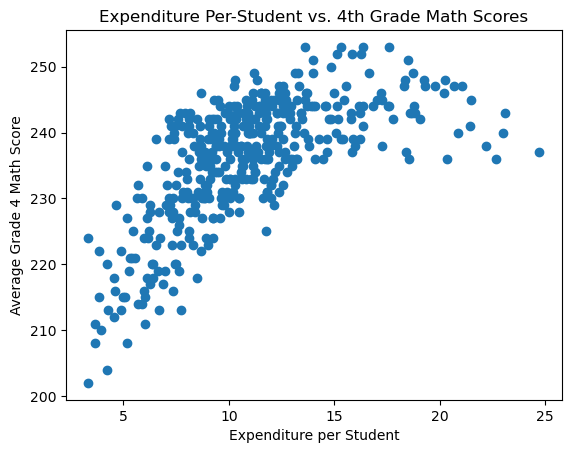

In [28]:
# @@@ 6
plt.scatter(states_edu["EXPENDITURE_PER_STUDENT"], states_edu["AVG_MATH_4_SCORE"])

plt.title("Expenditure Per-Student vs. 4th Grade Math Scores")
plt.xlabel("Expenditure per Student")
plt.ylabel("Average Grade 4 Math Score")
plt.show()

**According to the plot, Expenditure per Student is generally positively related to Average Grade 4 Math Scores. However, at the higher end of Expenditure, the scores start to drop a little bit, possibly inidicating that extremely high spending does not correlate to higher scores.**

**Visualization 2**

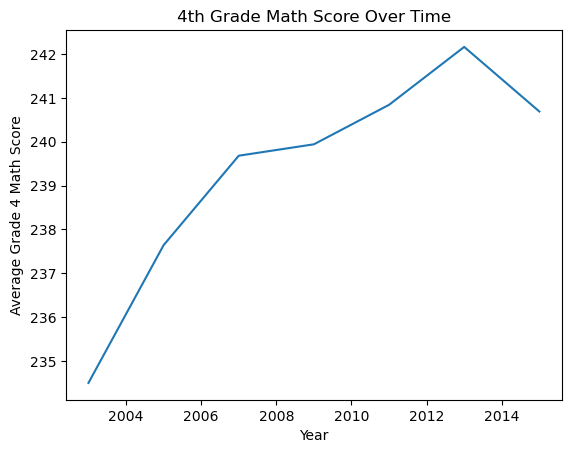

In [31]:
# @@@ 7
yearly_math4_avg = states_edu.dropna().groupby("YEAR")["AVG_MATH_4_SCORE"].mean().plot()

plt.title("4th Grade Math Score Over Time")
plt.xlabel("Year")
plt.ylabel("Average Grade 4 Math Score")
plt.show()

**According to the plot, Average Grade 4 Math Scores have only increased from 1992 until 2013 at different rates. However, at 2014, we see the first decrease in scores after an upward trend of scores for 21 years.**

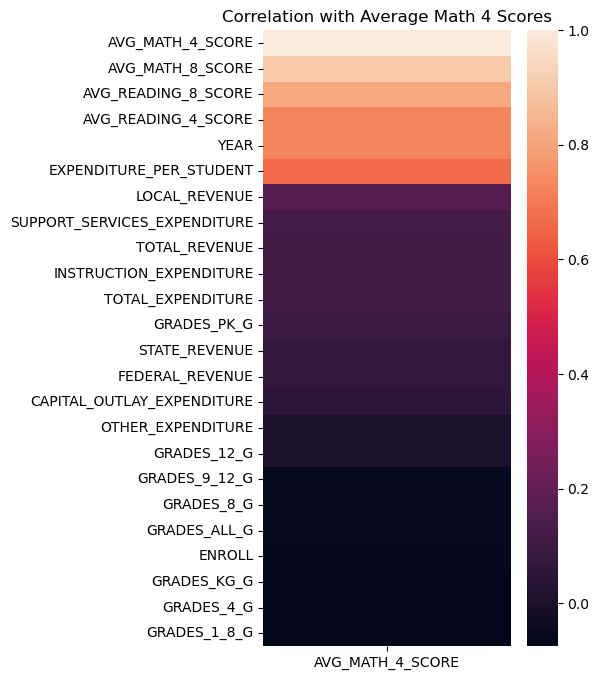

In [33]:
import seaborn as sns

numeric = states_edu.select_dtypes(include=np.number)
corr_math4 = numeric.corr()[["AVG_MATH_4_SCORE"]].sort_values(by="AVG_MATH_4_SCORE", ascending=False)

plt.figure(figsize=(4,8))
sns.heatmap(corr_math4)
plt.title("Correlation with Average Math 4 Scores")
plt.show()

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# @@@ 8

X = states_edu[["EXPENDITURE_PER_STUDENT", "AVG_MATH_8_SCORE", "YEAR"]].dropna()
y = states_edu.loc[X.index, "AVG_MATH_4_SCORE"]

In [37]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [40]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [41]:
# @@@ 11
# create your model here
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [46]:
# @@@ 12
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 9.281157701367572
Root Mean Squared Error: 3.046499253465783
R-squared: 0.8877437822114305


In [47]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)  
model_ols = sm.OLS(y_train, X_train_sm).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       AVG_MATH_4_SCORE   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sun, 14 Sep 2025   Prob (F-statistic):          2.60e-170
Time:                        12:10:18   Log-Likelihood:                -855.01
No. Observations:                 344   AIC:                             1718.
Df Residuals:                     340   BIC:                             1733.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.  

Text(0.5, 1.0, 'Model Behavior On Training Set')

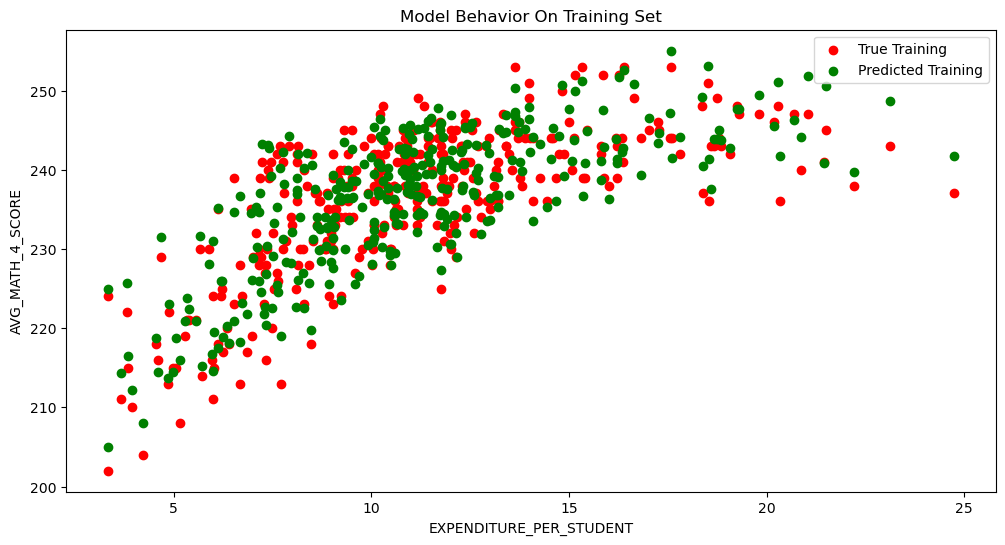

In [80]:
# @@@ 13

pred1 = X_train['EXPENDITURE_PER_STUDENT']

f = plt.figure(figsize=(12,6))
plt.scatter(pred1, y_train, color = "red")
plt.scatter(pred1, model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel('EXPENDITURE_PER_STUDENT')
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

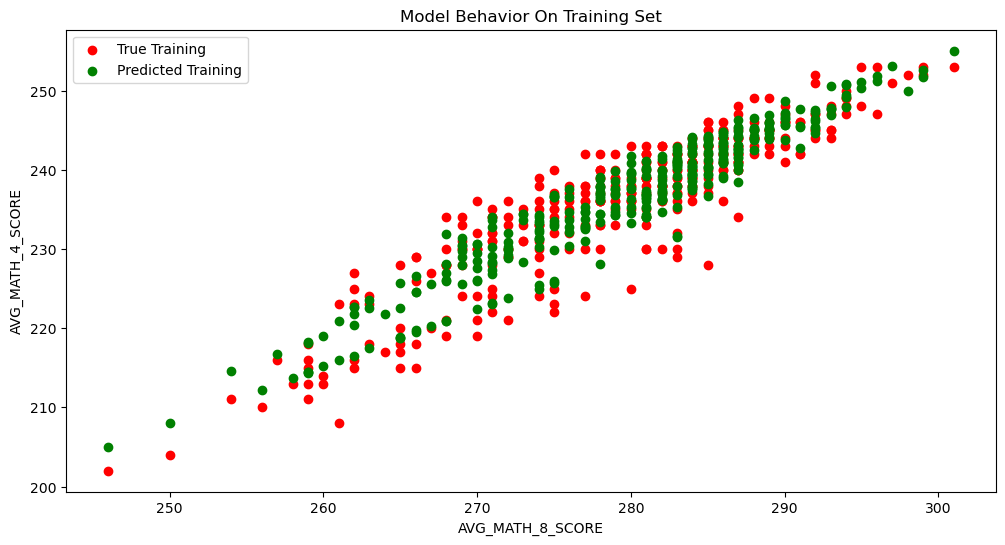

In [50]:
# @@@ 14

pred2 = X_train['AVG_MATH_8_SCORE']

f = plt.figure(figsize=(12,6))
plt.scatter(pred2, y_train, color = "red")
plt.scatter(pred2, model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel('AVG_MATH_8_SCORE')
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")